In [19]:
import os
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
# Define input dimension

img_width = 512
img_height = 512
img_channels = 3

In [11]:
# Load the training and testing data

train_path = "C:\\Users\\Sven\\Desktop\\EE981project\\Data\\images_roof_centered_geotiff"
path_mask = "C:\\Users\Sven\\Desktop\\EE981project\Data\\masks_segments_reviewed"
path_mask_seg = "C:\\Users\\Sven\Desktop\\EE981project\\Data\masks_superstructures_reviewed"

train_ids = next(os.walk(train_path))
mask_ids = next(os.walk(path_mask))
mask_seg_ids = next(os.walk(path_mask_seg))

print(len(train_ids[2]), len(mask_ids[2]), len(mask_seg_ids[2]))

1880 1880 1880


In [12]:
# Create empty tensors which will be populated by pixel values

X_full = np.zeros((len(train_ids[2]), img_height, img_width, img_channels), dtype = np.uint8)
Y_full = np.zeros((len(mask_ids[2]), img_height, img_width,1), dtype = np.bool_)

In [17]:
# Populate the two training tensors (one containing images and one containing masks)

for n, id in tqdm(enumerate(train_ids[2]), total = len(train_ids[2])):
    path = train_path + "\\" + id
    img = imread(path)[:,:,:img_channels]
    X_full[n] = img
    mask = imread(path_mask + "\\" + id.strip('.tif')+".png")
    mask = (mask != 17) # 17 is background

    Y_full[n] = tf.reshape(mask, [img_height, img_width,1])

100%|██████████| 1880/1880 [00:06<00:00, 287.18it/s]


## Display few observations

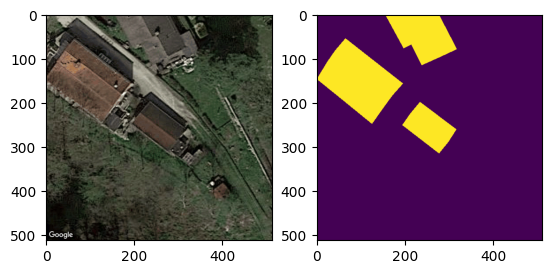

In [20]:
i = 0

plt.subplot(1, 2, 1)
plt.imshow(X_full[i])

plt.subplot(1, 2, 2)
plt.imshow(Y_full[i])

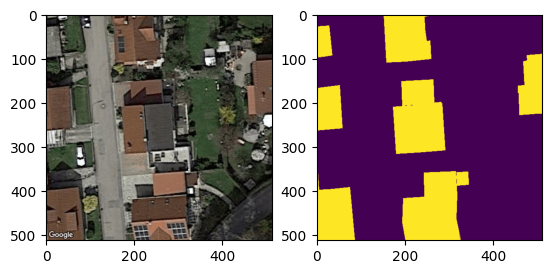

In [21]:
i = 6

plt.subplot(1, 2, 1)
plt.imshow(X_full[i])

plt.subplot(1, 2, 2)
plt.imshow(Y_full[i])

## Masks

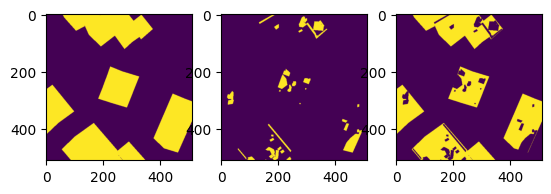

In [23]:
# The process of creating the new mask for a single image
# Rooftop

plt.subplot(1, 3, 1)
a = imread("C:\\Users\\Sven\\Desktop\\EE981project\\Data\\masks_segments_reviewed\\2.png")
a = (a != 17)
plt.imshow(a)

# Rooftop segments

plt.subplot(1, 3, 2)
b = imread("C:\\Users\\Sven\\Desktop\\EE981project\\Data\\masks_superstructures_reviewed\\2.png")
b = (b != 8) 
plt.imshow(b)

# Rooftop without segments

plt.subplot(1, 3, 3)
c = ((a == True) & (b == False))
plt.imshow(c)

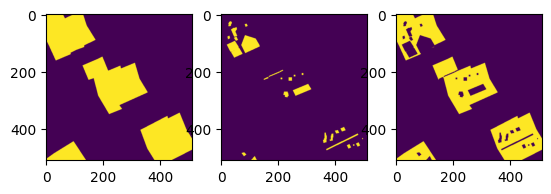

In [26]:
# The process of creating the new mask for a single image
# Rooftop

plt.subplot(1, 3, 1)
a = imread("C:\\Users\\Sven\\Desktop\\EE981project\\Data\\masks_segments_reviewed\\35.png")
a = (a != 17)
plt.imshow(a)

# Rooftop segments

plt.subplot(1, 3, 2)
b = imread("C:\\Users\\Sven\\Desktop\\EE981project\\Data\\masks_superstructures_reviewed\\35.png")
b = (b != 8) 
plt.imshow(b)

# Rooftop without segments

plt.subplot(1, 3, 3)
c = ((a == True) & (b == False))
plt.imshow(c)

## Data augmentation

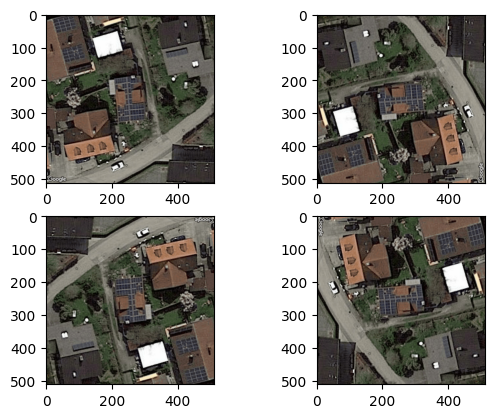

In [29]:
# Original image
plt.subplot(2, 2, 1)
plt.imshow(X_full[519])

# Rotate the original image 90 degress
rot1 = tf.image.rot90(X_full[519])  
plt.subplot(2, 2, 2)
plt.imshow(rot1)

# Rotate the original image 180 degress
rot2 = tf.image.rot90(rot1)
plt.subplot(2, 2, 3)
plt.imshow(rot2)

# Rotate the original image 270 degress
rot3 = tf.image.rot90(rot2)
plt.subplot(2, 2, 4)
plt.imshow(rot3)

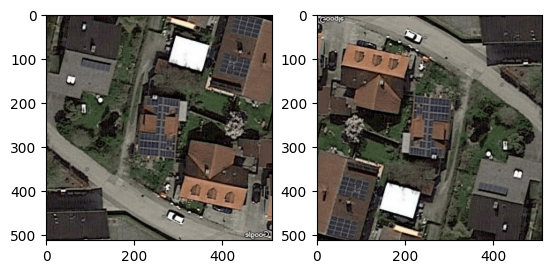

In [30]:
# Flip around the y-axis

plt.subplot(1, 2, 1)
plt.imshow(tf.image.flip_left_right(X_full[519]))

plt.subplot(1, 2, 2)
plt.imshow(tf.image.flip_up_down(X_full[519]))